<a href="https://colab.research.google.com/github/DasSagor/Machine-Learning/blob/main/Module_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
dataset = files.upload()

df = pd.read_csv('Titanic-Dataset.csv')

df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


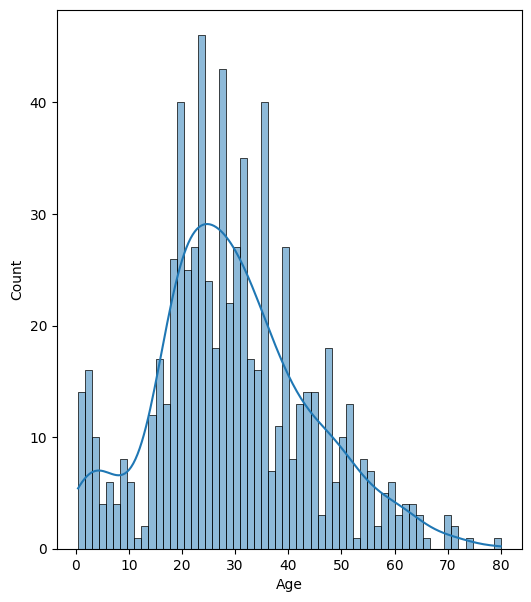

In [ ]:
plt.figure(figsize=(6,7))

sns.histplot(df['Age'], kde=True, bins = 60)
plt.show()

# we will use Median as the feature values are right skewed

<Axes: xlabel='Embarked', ylabel='count'>

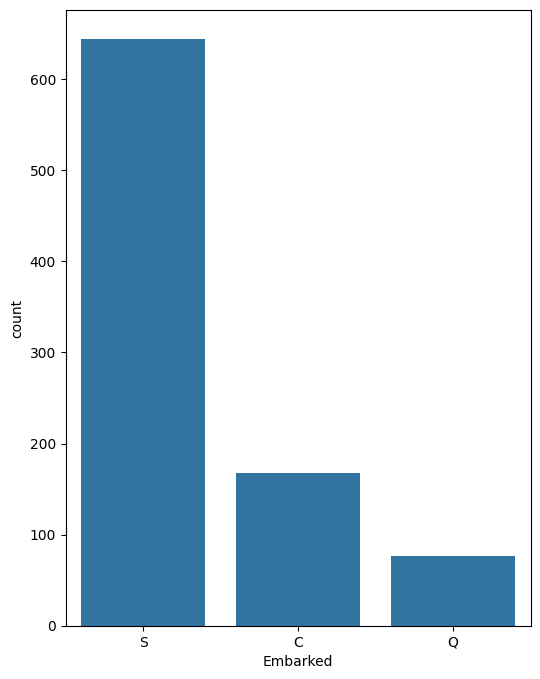

In [ ]:
plt.figure(figsize=(6,8))

sns.countplot(data=df, x='Embarked')
# plt.show()

In [ ]:
# Handle numeric missing values: Age

age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

# Handle categorical missing values: Embarked

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)

# Drop Cabin(Too many missing values)
df = df.drop(columns=['Cabin'])

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Encoding Categorical Variables or Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
dataset = files.upload()

df_heart = pd.read_csv('heart.csv')

df_heart.head()

Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_heart.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


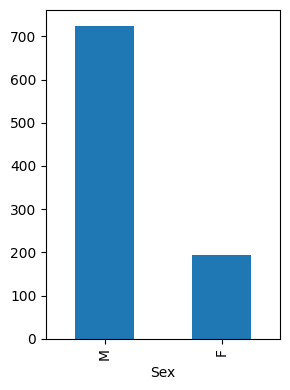

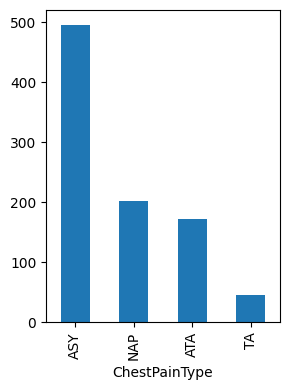

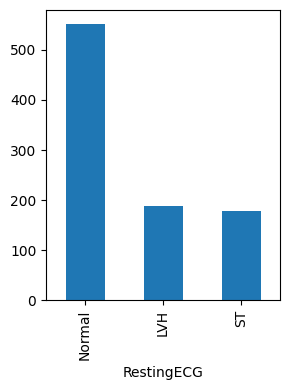

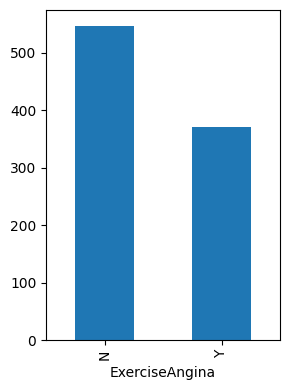

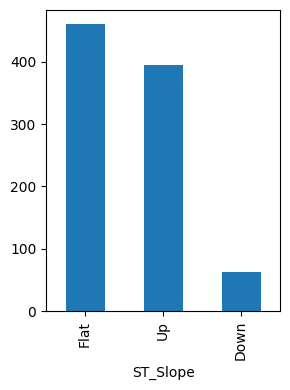

In [ ]:
# Categorical Feature Exploration
categorical_cols = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for c in categorical_cols:
    plt.figure(figsize=(3,4))
    df_heart[c].value_counts().plot(kind='bar')
    plt.tight_layout()
    plt.show()

In [ ]:
# Label Encoding for binary categorical col -> Sex and ExerxiseAngina
le = LabelEncoder()

df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])

df_heart.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [ ]:
# One-Hot Encoding for nominal categorical cols

cat_cols = ['ChestPainType','RestingECG','ST_Slope']

df_heart_encoded = pd.get_dummies(df_heart,columns=cat_cols,dtype=int)

df_heart_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


### Normalization and Scaling

In [ ]:
# Assume df_heart_encoded is our working dataframe with target 'HeartDisease'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler


target_col = 'HeartDisease'

x = df_heart_encoded.drop(columns='HeartDisease')
y = df_heart_encoded['HeartDisease']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=42)


# Standard Scaling
scaler_sd = StandardScaler()

x_train_std = scaler_sd.fit_transform(x_train)

x_train_std_df = pd.DataFrame(x_train_std, columns=x_train.columns, index=x_train.index)

x_train_std_df.head(10)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
416,0.985202,0.537019,0.373828,0.543584,-0.532524,-0.966849,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
359,-0.080384,0.537019,-1.516111,-1.878000,-0.532524,-0.846966,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
311,0.665526,0.537019,-0.436146,-1.878000,1.877849,-1.046771,-0.845997,-0.743565,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
580,-0.293501,0.537019,-0.112156,-0.462305,1.877849,-0.247550,1.182037,0.076994,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064
707,0.026175,0.537019,-0.490144,0.599466,-0.532524,-1.086732,1.182037,1.171072,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064


In [ ]:
# Min-Max Scaling

scaler_mm = MinMaxScaler()

x_train_mm = scaler_mm.fit_transform(x_train)

x_train_mm_df = pd.DataFrame(x_train_mm, columns=x_train.columns, index=x_train.index)

x_train_mm_df.head(10)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
416,0.708333,1.0,0.700,0.431177,0.0,0.379845,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
359,0.500000,1.0,0.525,0.000000,0.0,0.403101,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
311,0.645833,1.0,0.625,0.000000,1.0,0.364341,0.0,0.306818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
580,0.458333,1.0,0.655,0.252073,1.0,0.519380,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
707,0.520833,1.0,0.620,0.441128,0.0,0.356589,1.0,0.545455,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Robust Scaling

scaler_rb = RobustScaler()

x_train_rb = scaler_rb.fit_transform(x_train)

x_train_rb_df = pd.DataFrame(x_train_rb, columns=x_train.columns, index=x_train.index)

x_train_rb_df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.153846,0.0,1.25,1.307479,1.0,0.324324,1.0,1.5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362,0.153846,0.0,1.25,-2.481994,0.0,-1.054054,0.0,-0.3750,-1.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
869,0.384615,0.0,1.00,-0.132964,1.0,0.513514,0.0,0.6250,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
101,-0.230769,0.0,0.00,-0.498615,0.0,-1.027027,0.0,-0.3750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
199,0.230769,-1.0,0.00,0.930748,0.0,-1.081081,0.0,0.2500,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.692308,0.0,0.50,0.398892,0.0,-0.702703,1.0,1.5000,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
359,-0.076923,0.0,-1.25,-2.481994,0.0,-0.621622,0.0,-0.3750,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.461538,0.0,-0.25,-2.481994,1.0,-0.756757,0.0,-0.3125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
580,-0.230769,0.0,0.05,-0.797784,1.0,-0.216216,1.0,0.2500,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
707,0.000000,0.0,-0.30,0.465374,0.0,-0.783784,1.0,1.0000,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
